# **Dealing With Missing Valus**

# Import Libraries

In [243]:
# pip install pandas numpy matplotlib seaborn scipy scikit-learn jupyter openpyxl plotly

In [244]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer


# Load Dataset

In [245]:
df = sns.load_dataset('titanic')

# Finding missing values

In [246]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

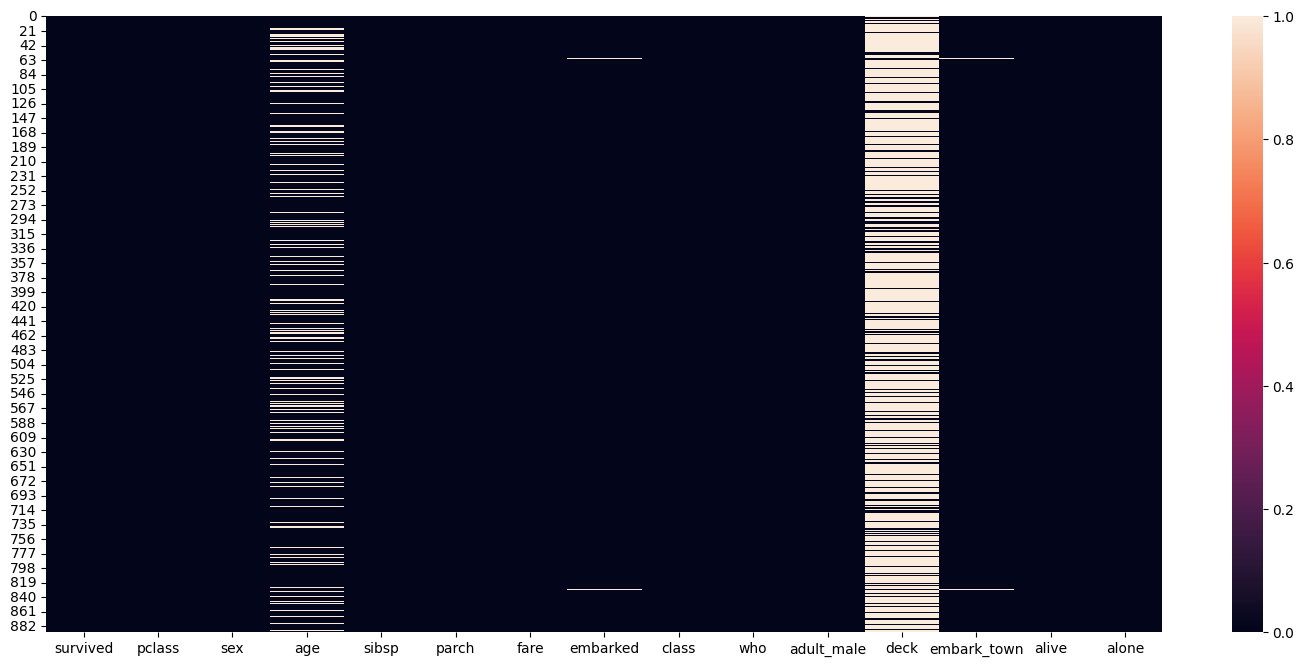

In [247]:
plt.figure(figsize=(18,8))
sns.heatmap(df.isnull())
plt.show()

In [248]:
df.isnull().sum() / len(df.isnull()) * 100

survived        0.000000
pclass          0.000000
sex             0.000000
age            19.865320
sibsp           0.000000
parch           0.000000
fare            0.000000
embarked        0.224467
class           0.000000
who             0.000000
adult_male      0.000000
deck           77.216611
embark_town     0.224467
alive           0.000000
alone           0.000000
dtype: float64

# Filling age values with `mean`

In [249]:
df['age'] = df['age'].fillna(df['age'].mean())

# Filling age values with `median`

In [250]:
df['age'] = df['age'].fillna(df['age'].median())

In [251]:
# drop the columns deck
df.drop('deck',inplace=True, axis=1)

# Replacing embarked and embark_town values with `mode`

In [252]:
df['embark_town'] = df['embark_town'].fillna(df['embark_town'].mode()[0])
df['embarked'] = df['embarked'].fillna(df['embarked'].mode()[0])

In [253]:
df.isnull().sum().sort_values(ascending=False)

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64

# **We can also impute missing values with `sklearn`**

In [254]:
data = sns.load_dataset('titanic')
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


# Impute age columns using `simpleimputer` from sklearn

In [255]:
imputer = SimpleImputer(strategy='median')
data['age'] = imputer.fit_transform(data[['age']])


# `Multivariate imputationiate `

In [256]:
df1 = sns.load_dataset('titanic')

In [257]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [258]:
imputer =  IterativeImputer(max_iter=20, n_nearest_features=5)
df1['age'] = imputer.fit_transform(df1[['age']])

In [259]:
df1.isnull().sum().sort_values(ascending=False)

deck           688
embarked         2
embark_town      2
age              0
survived         0
pclass           0
sex              0
fare             0
parch            0
sibsp            0
class            0
adult_male       0
who              0
alive            0
alone            0
dtype: int64

# `Forward fill and Backward fill `

In [260]:
# using forward fill impute age column
df['age'] = df['age'].ffill()

In [261]:
# using backward fill impute age column
df['age'] = df['age'].bfill()

# **Using `KNN` imputer**

In [262]:
from sklearn.impute import KNNImputer

In [263]:
imputer  = KNNImputer(n_neighbors=5)
df['age'] = imputer.fit_transform(df[['age']])


# `Drop` rows having missing values

In [264]:
df.dropna(inplace=True)

In [265]:
df.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64

In [266]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          891 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     891 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  embark_town  891 non-null    object  
 12  alive        891 non-null    object  
 13  alone        891 non-null    bool    
dtypes: bool(2), category(1), float64(2), int64(4), object(5)
memory usage: 79.4+ KB
